# Conway生命游戏

你可以用计算机来研究一个系统，方法是建立该系统的数学模型，编程表示该模型，然后让该模型随着时间的推移而演进。有很多种计算机模拟，但我会专注于一个著名的模拟，即 `Conway` 生命游戏，它是英国数学家John Conway 的成果。生命游戏是细胞自动机，即网格上的一组彩色细胞，根据定义相邻细胞状态的一组规则，经过一些时间逐步演进。  
这个项目将创建一个 `N×N` 的细胞网格，通过应用 `Conway` 生命游戏的规则，模拟系统随时间的演进。你将显示每个时间段的游戏状态，并提供一些方式将输出保存到文件。你会设置系统的初始状态，要么是随机分布，要么是预先设计的图案。  
该模拟由以下几部分组成：
- 在一维或两维空间中定义的属性；
- 在模拟中的每一步，改变这种属性的数学规则；
- 随着系统的演进，显示或记录系统状态的方式。

在 `Conway` 生命游戏中的细胞可以处于 `ON` 或 `OFF` 状态。游戏从一个初始状态开始，其中每个细胞分配一个状态，数学规则决定其状态如何随时间而改变。`Conway` 生命游戏中令人惊奇的是，只有4个简单的规则，系统演进会产生行为极其复杂的图案，仿佛它们是活的。图案包括“滑翔机”，即在网格上滑动，“眨眼”，即闪烁 `ON` 和 `OFF`，甚至还有复制图案。  
当然，这个游戏的哲学意义也很重要，因为它们表明，复杂的结构可以根据简单的规则演进，不必遵循任何一种预设的模式。  
下面是该项目包含的一些主要概念：
- 利用 `matplotlib imshow` 来展示数据的二维网格；
- 利用 `matplotlib` 生成动画；
- 使用 `numpy` 数组；
- 将%运算符用于边界条件；
- 设置值的随机分布。

## 1. 工作原理

因为生命游戏建立在 9 个方格的网格中，每个细胞有8 个相邻细胞，如下图所示。模拟中的给定细胞`(i, j)`用二维数组`[i][j]`来存取，其中 i 和j 分别是行和列的下标。在给定时间段，给定细胞的值取决于前一时间段它的邻居的状态。`Conway` 生命游戏有 4 个规则。
1. 如果一个细胞为 `ON`，邻居中少于两个为 `ON`，它变为 `OFF`。
2. 如果一个细胞为 `ON`，邻居中有两个或3个为 `ON`，它保持为 `ON`。
3. 如果一个细胞为 `ON`，邻居中超过3个为 `ON`，它变为 `OFF`。
4. 如果一个细胞为 `OFF`，邻居中恰好有3个为 `ON`，它变为 `ON`。

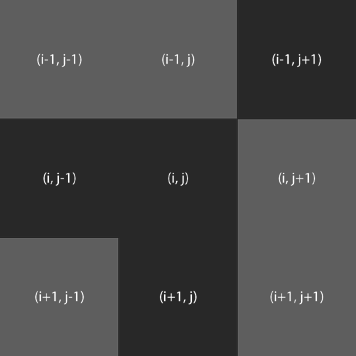

这些规则是为了反映一些基本方式，即一群生物体随时间推移的遭遇：如果细胞邻居少于2或多于3，种群太少或种群太多都会杀死细胞，将细胞变为 `OFF`；如果种群平衡，细胞保持为 `ON` 并繁殖，将另一个细胞从 `OFF` 变为 `ON`。但是，在网格边缘的细胞呢？哪些细胞是自己的邻居？要回答这个问题，就要考虑边界条件，决定细胞在网格边缘或边界时的规则。我将采用环形边界条件，这意味着正方形网格卷起来，构成一个环面，从而解决这个问题。如下图（环型边界条件的概念视图）所示，网格先卷起来，使它的水平边缘（A和B）相连，形成一个圆柱体，然后圆柱体的垂直边缘（C和D）相连，以形成一个环面。形成环面后，所有细胞都有邻居，因为整个空间没有边缘。

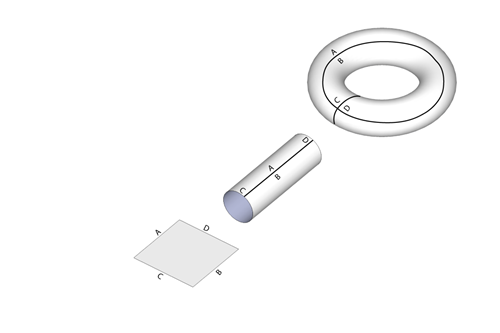

注意 这类似于 `Pac-Man`（吃豆子）在边界的工作方式。如果超出了屏幕的顶部，就会重新在底部出现。如果超出了屏幕的左侧，就会重新在右侧出现。这种边界条件在二维模拟中很常见。  
以下是算法描述，我们用它来应用这4 个规则，并运行模拟。
1. 初始化网格中的细胞。
2. 在模拟的每个时间段，对于网格中每个细胞(i, j)，做下面的事：  
    a. 根据它的邻居更新细胞(i, j)的值，同时考虑到边界条件；  
    b. 更新网格值的显示。

## 2. 代码

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

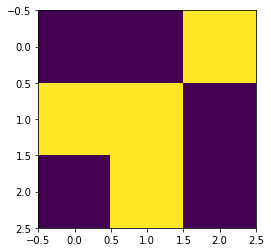

In [2]:
x = np.array([[0, 0, 255], [255, 255, 0], [0, 255, 0]])
plt.imshow(x, interpolation='nearest')